# Data Mining Project

**Authors:**
<br>Yogev Matalon
<br>Tomer Yanay
<br>Noam Tor

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use("ggplot")
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib inline

## Load Data

In [9]:
df = pd.read_csv("train.csv")
df.head(5)

,feat_56,feat_7,feat_69,feat_12,feat_70,feat_51,feat_20,feat_21,feat_61,feat_23,target
0,0,0,0,0,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,0,0,0,0,0,Class_6
2,0,0,0,0,1,0,0,6,5,0,Class_6
3,0,0,0,0,6,0,0,0,0,0,Class_3
4,0,0,0,0,2,0,0,0,0,0,Class_3


# Step 1 - Data Exploration

### Find the most common classes and filter the dataset

C:\Users\noamt\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


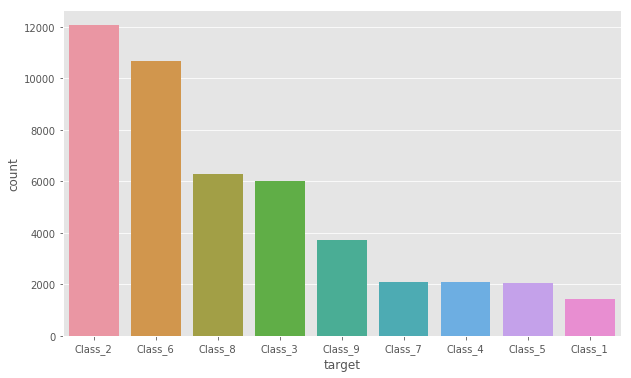

In [10]:
plt.figure(num=None, figsize=(10, 6), facecolor='w', edgecolor='k')
h = sns.countplot(x="target", data=df, order = df['target'].value_counts().index)

We can see that the most commun classes are number 2 and 6. We will use these classes for our project, and remove all other rows with other classes.

In [11]:
old_row_num = df.shape[0]
df = df[(df['target'] == 'Class_6') | (df['target'] == 'Class_2')]  # Select Features 2 and 6 only.
df.head(5)
row_num = df.shape[0]
print (old_row_num - row_num, "rows were removed.\nNow we have ", str(df.shape[0]) ," rows in our data.")

23689 rows were removed.
Now we have  22719  rows in our data.


Data Label Distribution:

         NumOfRows  RowsPercent
Class_2      12059     0.530789
Class_6      10660     0.469211


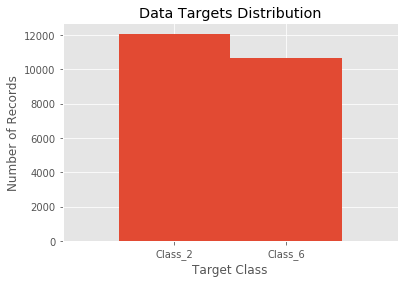

In [12]:
print('Data Label Distribution:\n')
classes_dist = pd.concat([pd.DataFrame(df.target.value_counts()), pd.DataFrame(df.target.value_counts())["target"] / df.shape[0]], axis = 1)
classes_dist.columns = ["NumOfRows" , "RowsPercent"]
print (classes_dist)

df.target.hist(bins=np.arange(3) - 0.5, width=1)
plt.xticks(range(2))
plt.xlim([-1, 2])
plt.title('Data Targets Distribution')
plt.xlabel('Target Class')
plt.ylabel('Number of Records')
plt.show()

We can declare that the classes are well-balanced.

## Explore the Features
### Description and Box Plot

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22719 entries, 0 to 46406
Data columns (total 11 columns):
feat_56    22719 non-null int64
feat_7     22719 non-null int64
feat_69    22719 non-null int64
feat_12    22719 non-null int64
feat_70    22719 non-null int64
feat_51    22719 non-null int64
feat_20    22719 non-null int64
feat_21    22719 non-null int64
feat_61    22719 non-null int64
feat_23    22719 non-null int64
target     22719 non-null object
dtypes: int64(10), object(1)
memory usage: 2.1+ MB


All features are non-null, int64 dtype.

In [14]:
df.describe()  # Ge thte mathematical description of the data

,feat_56,feat_7,feat_69,feat_12,feat_70,feat_51,feat_20,feat_21,feat_61,feat_23
count,22719.000000,22719.000000,22719.000000,22719.000000,22719.000000,22719.000000,22719.000000,22719.000000,22719.000000,22719.000000
mean,0.177209,0.064704,0.116158,0.129143,0.678903,0.058629,0.229367,0.306087,0.455258,0.079801
std,0.850590,0.336531,0.594397,0.446203,1.562736,0.585949,0.714869,0.857623,1.377320,0.466895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,42.000000,9.000000,21.000000,12.000000,32.000000,44.000000,13.000000,13.000000,33.000000,15.000000


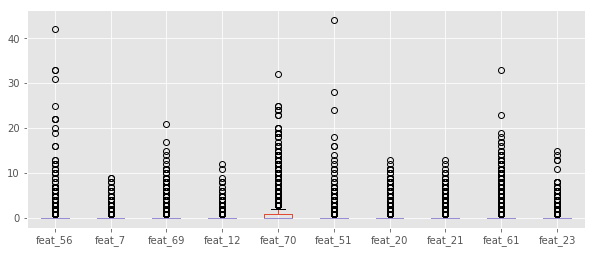

In [15]:
plt.figure(figsize=(10, 4))
df.boxplot()

We can see that in most features, most of our data is 0. The Box Plots have no size, and "stuck" at 0, and the data which is not zero is marked as outliers.

### Distribution of each feature within the classes

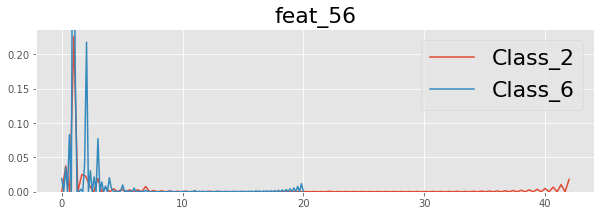

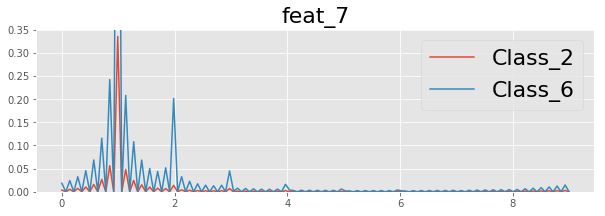

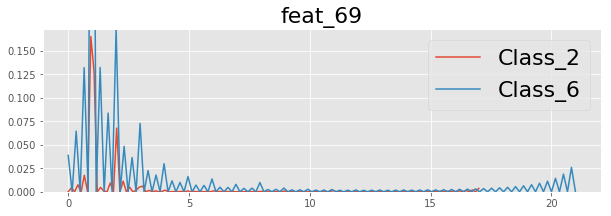

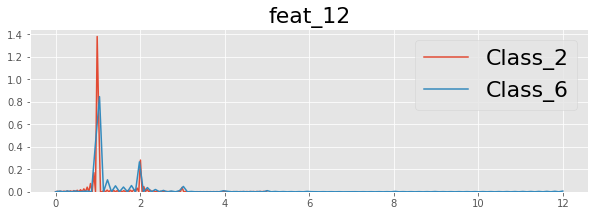

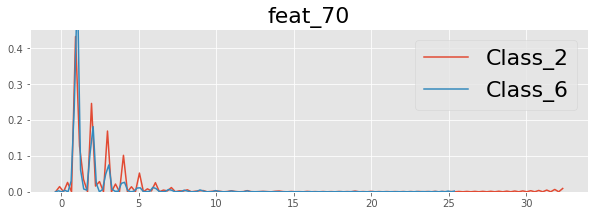

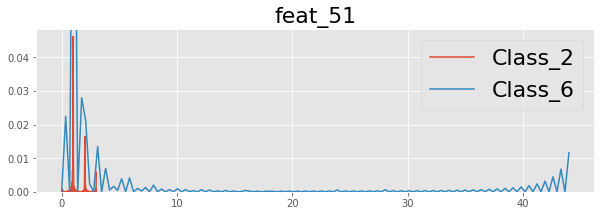

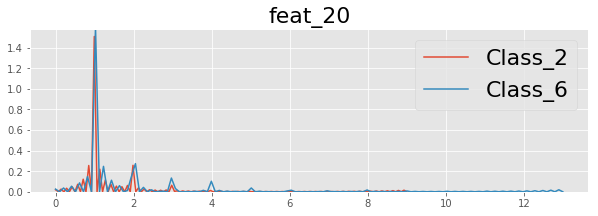

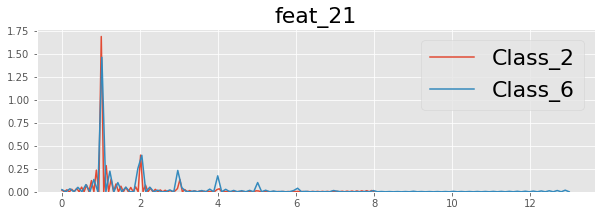

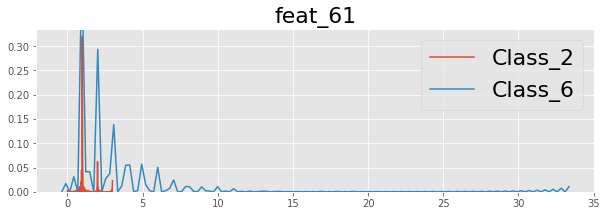

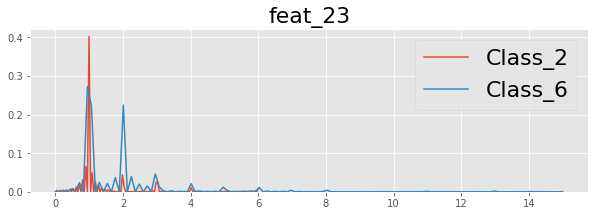

In [16]:
for col in df.columns[:-1]:
    plt.figure(figsize=(10,3))
    sns.kdeplot(df.loc[df.target=='Class_2', col], label='Class_2')  # KDE of class 2
    sns.kdeplot(df.loc[df.target=='Class_6', col], label='Class_6')  # KDE of class 6
    plt.legend(fontsize=22)
    plt.title(col, fontsize=22);

### Understand the sparse of each feature

In [18]:
print "Non zeros percent in each feture:"
y = ((df[:-1] !=0).sum() / row_num)[:-1]
x = df.columns[:-1]
plt.figure(figsize=(10,3))
plt.bar(x, y, width, color="darkblue")
plt.show()
print (y)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("Non zeros percent in each feture:")? (<ipython-input-18-451545511b88>, line 1)

We can see that the data is **very sparse**, places withot zero are very important, and we will build new features based on this insight.

In [ ]:
#המחשבה שלי פה זה ליצור גרף שמראה כמה לא אפסים יש בכל פיצ'ר ביחס לכמות הרשומות בכל קלאס, עוד לא סיימתי עם זה
#צריך גם להוסיף עמודה של כמה אפסים יש בכל רשומה, מסתמן שזה פיצ'ר חשוב פה
print "now with respect to target:"
for col in df.columns[:-1]:
    bar_1 = ((df[(df[col] != 0) & (df['target']=='Class_2')]).shape[0]) / float(df[df['target'] == "Class_2"].shape[0])
    bar_2 = (df[(df[col] != 0) & (df['target']=='Class_6')]).shape[0] / float(df[df['target'] == "Class_6"].shape[0])
    pd.DataFrame(np.array([bar_1,bar_2])).plot.bar
    plt.show()

### Understand the features correlation

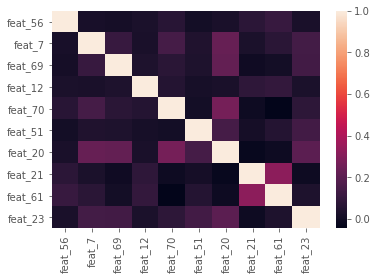

In [19]:
cor_mat = df.corr()
sns.heatmap(cor_mat)

We cannot see any significant correlation.

In [20]:
# For ease of use, lets declare an array called X that will include the features columns names, and Y, the target.

X = list(df.columns)[:-1]
Y = ['target']

# Step 2 - Pre-Processing

### Outliers Removal
No Outliers Removal needed. Explanation can be find in the attached pdf.

### Data Normalization

In [44]:
# MinMax normaliztion
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df[X]))
df_norm.columns = [col + "_norm" for col in df[X].columns]

df = pd.concat([df, df_norm], axis=1)

df.head(5)

,feat_56,feat_7,feat_69,feat_12,feat_70,feat_51,feat_20,feat_21,feat_61,feat_23,...,feat_56_norm,feat_7_norm,feat_69_norm,feat_12_norm,feat_70_norm,feat_51_norm,feat_20_norm,feat_21_norm,feat_61_norm,feat_23_norm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02381,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,5.0,0.0,...,0.00000,0.0,0.0,0.0,0.03125,0.0,0.0,0.461538,0.151515,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0


# Step 3 - Feature Selection

### PCA

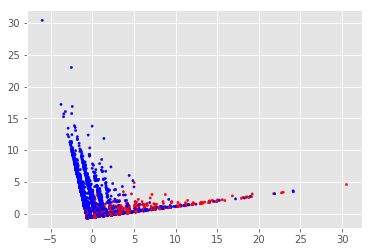

In [10]:
x = df.drop(['target'], axis=1)
y = df['target']=='Class_2'
pca = PCA(n_components=2)
pca.fit(x)
reduced_data_PCA = pca.transform(x)
plt.scatter(reduced_data_PCA[:, 0], reduced_data_PCA[:, 1], c=y, s=5, cmap = "bwr")
plt.show()

we can see that the PCA components are not very effective to seperate between the two classes.

### LDA

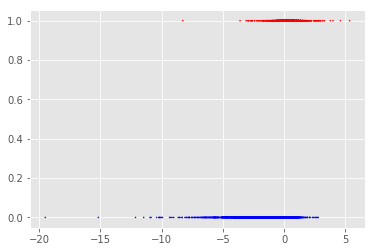

In [13]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(x, y)
reduced_data_LDA = LDA.transform(x)
plt.scatter(reduced_data_LDA[:, 0], y, c=y, s=1, cmap = "bwr")
plt.show()

# Feature extraction

In [16]:
# insert the number of zeros for each row
df['zeros_number'] = (df == 0).astype(int).sum(axis=1)
df

,feat_56,feat_7,feat_69,feat_12,feat_70,feat_51,feat_20,feat_21,feat_61,feat_23,target,zeros_number
0,0,0,0,0,0,0,0,0,0,0,Class_2,10
1,1,0,0,0,0,0,0,0,0,0,Class_6,9
2,0,0,0,0,1,0,0,6,5,0,Class_6,7
5,0,0,0,0,0,0,0,0,0,0,Class_6,10
6,0,0,0,0,0,0,0,0,0,0,Class_2,10
7,0,0,0,0,0,0,0,1,4,0,Class_6,8
8,1,0,0,0,7,0,1,1,0,0,Class_2,6
9,0,0,0,0,0,0,1,0,0,0,Class_6,9
11,0,0,0,0,0,0,0,0,0,0,Class_2,10
15,0,0,0,0,0,0,0,0,0,0,Class_2,10


In [22]:
# we have al lot of rows with 10 zeros (all the fetures are 0), let's check if we can remove them as outliars
print df[(df['zeros_number']==10) & (df['target']=='Class_2')].shape[0]
print df[(df['zeros_number']==10) & (df['target']=='Class_6')].shape[0]

6196
2385
